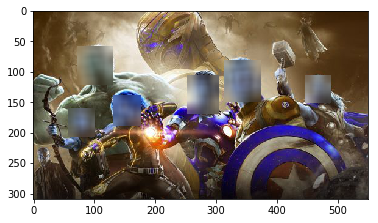

In [19]:
import cv2
import tensorflow as tf
import numpy as np
import facenet
import facenet.src.align.detect_face as df
import matplotlib.pyplot as plt

img = cv2.imread('avengers.jpg')

with tf.Graph().as_default():
    sess = tf.Session()
    with sess.as_default():
        pnet, rnet, onet = df.create_mtcnn(sess, None)
    
minsize = 2 # minimum size of face
threshold = [ 0.1, 0.5, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor

img = img[:,:,0:3]
    
bounding_boxes, _ = df.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
nrof_faces = bounding_boxes.shape[0]

det = bounding_boxes[ : , 0 : 4]
det_arr = []
img_size = np.asarray(img.shape)[0 : 2]

for i in range(nrof_faces):
    det_arr.append(np.squeeze(det[i]))
    
for i, det in enumerate(det_arr):
    det = np.squeeze(det)
    bb = np.zeros(4, dtype = np.int32)
    bb[0] = np.maximum(det[0] - 10, 0)
    bb[1] = np.maximum(det[1] - 10, 0)
    bb[2] = np.minimum(det[2] + 10, img_size[1])
    bb[3] = np.minimum(det[3] + 10, img_size[0])
    cropped = img[bb[1] : bb[3], bb[0] : bb[2], : ]
    
    img[bb[1] : bb[3], bb[0] : bb[2], : ] = cv2.blur(cropped, (25, 25))

plt.imshow(img)
plt.show()
# cv2.imwrite("avengers_result.jpg", img)
